In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

In [2]:
dataframe = pd.read_csv('../../data/jobs_in_data.csv')
dataframe.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


<Axes: >

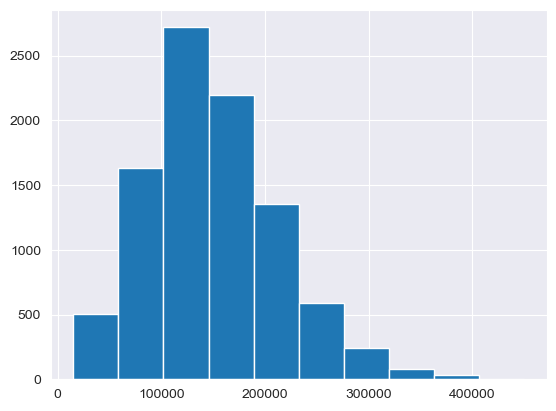

In [3]:
dataframe['salary_in_usd'].hist()

Assimentria normal 
A assimetria abaixo indica que ela esta para a direita ->

In [4]:
dataframe['salary_in_usd'].skew()

0.6212912531604922

Assimetria de pearson

In [5]:
sp.stats.skew(dataframe['salary_in_usd'])

0.6211916296018803

assimetria de fisher

In [6]:
def calcular_assimetria_fisher(dados):
    # Calcular o terceiro momento central
    momento_central_3 = np.mean((dados - np.mean(dados))**3)

    # Calcular o desvio padrão
    desvio_padrao = np.std(dados)

    # Calcular a assimetria usando Momentos de Fisher
    assimetria_fisher = momento_central_3 / desvio_padrao**3

    return assimetria_fisher
calcular_assimetria_fisher(dataframe['salary_in_usd'])

0.6211916296018661

## Curtose

In [7]:
dataframe['salary_in_usd'].kurt()

0.5672418328471021

In [8]:
curtose_valor = sp.stats.kurtosis(dataframe['salary_in_usd'])

print(f'Curtose: {curtose_valor}')

Curtose: 0.5662974027614927


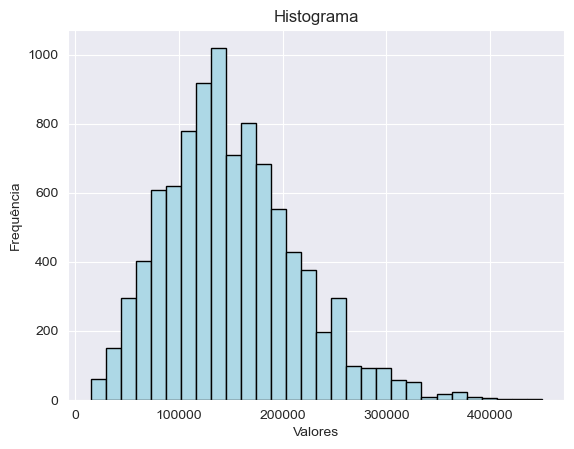

In [9]:
plt.hist(dataframe['salary_in_usd'], bins=30, color='lightblue', edgecolor='black')

# Adiciona rótulos e título
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma')

# Exibe o histograma
plt.show()

No caso acima a Curtose é Leptocútica

## Correlação
### Pearson

In [12]:
dataframe[['salary_in_usd','salary']].corr()

,salary_in_usd,salary
salary_in_usd,1.000000,0.991309
salary,0.991309,1.000000


### Spearman

In [13]:
dataframe[['salary_in_usd','salary']].corr(method='spearman')

,salary_in_usd,salary
salary_in_usd,1.000000,0.992993
salary,0.992993,1.000000


### Kendall

In [15]:
dataframe[['salary_in_usd','salary']].corr(method='kendall')

,salary_in_usd,salary
salary_in_usd,1.000000,0.982467
salary,0.982467,1.000000
